# 4장 로지스틱 회귀분석 

데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고,그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류하는 기법<br>
(종속 변수가 범주형일때만 사용하는 회귀모델)

로지스틱 회귀 분석은 이진 분류를 수행하는 데 사용된다. 즉, 데이터 샘플을 양성(1) 또는 음성(0) 클래스 
둘 중 어디에 속하는지 예측한다. 각 속성(feature)들의 계수 log-odds를 구한 후 시그모이드 함수를 적용
하여 실제로 데이터가 해당 클래스에 속할 확률을 0과 1사이의 값으로 나타낸다

- 오즈비(Odds Ratio)<br>
오즈비는 사건이 발생할 확률이 발생하지 않을 확률에 비해 몇 배 더 높은가를 설명하는 개념이다

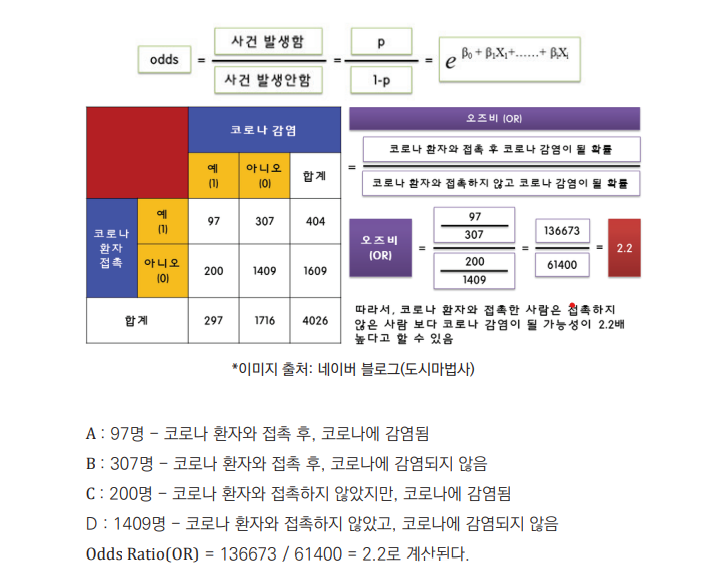

- 로짓(logit) 변환: 오즈비에 log 함수 적용한 것으로 로짓을 대상으로 회귀분석을 적용한 것이 로지스틱 
회귀분석이 된다.

## 주요 하이퍼파라미터
- 'C' : 디폴트:1, 작을수록 모델이 단순해지고 커질수록 모델이 복잡, C는 로그스케일(0.01, 0.1, 10, 100 등) 단위로 최적치 탐색 권고<br>
- 'solver' : 데이터 양이 수백~수십만 건인 경우 Full-batch로 할경우 시간이 오래 걸림, 따라서 조절 필요, <br>
종류는 liblinear / newton-cg, lbfgs 멀티클래스 분류 / sag, saga 확률적경사기법 대용량 데이터 등이 있음

# 분석 코드 

1. 데이터 준비

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
data=pd.read_csv('./[1]BigData_data_최종본(0910)/breast-cancer-wisconsin.csv', encoding='utf-8')
X=data[data.columns[1:10]]
y=data[["Class"]]

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42)

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

2. 기본모델 적용

In [4]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.97265625

In [5]:
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:{}(accuracy) \n".format((confusion_train[0,0] + confusion_train[1,1])/confusion_train.sum()), confusion_train)


훈련데이터 오차행렬:0.97265625(accuracy) 
 [[328   5]
 [  9 170]]


In [6]:
from sklearn.metrics import classification_report
cfreport_train=classification_report(y_train, pred_train)
print("분류예측 레포트:\n", cfreport_train)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [7]:
#test

In [8]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.9590643274853801

In [9]:
confusion_test=confusion_matrix(y_test, pred_test)
print("훈련데이터 오차행렬: \n", confusion_test)

훈련데이터 오차행렬: 
 [[106   5]
 [  2  58]]


In [10]:
cfreport_test=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport_test)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



3. 하이퍼 파라미터 서치

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid= {'C':[0.001, 0.01,0.1,1,10,100]}
grid_search=GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [12]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Score: {:.4f}".format(grid_search.best_score_))
print("TestSet Score: {:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter: {'C': 10}
Best Score: 0.9726
TestSet Score: 0.9591


In [13]:
from scipy.stats import randint
param_distribs={'C': randint(low=0.001, high=100)}
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(LogisticRegression(), 
                                 param_distributions=param_distribs, n_iter=100, cv=5)
random_search.fit(X_scaled_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D8E1BC1AC0>})

In [14]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Score: {:.4f}".format(random_search.best_score_))
print("TestSet Score: {:.4f}".format(random_search.score(X_scaled_test, y_test)))

Best Parameter: {'C': 12}
Best Score: 0.9745
TestSet Score: 0.9591



---
추가 부분 <br>
4. 평가

In [15]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [16]:
trains_cols = data.columns[1:10]

In [17]:
logit = sm.Logit(data[["Class"]],X) 
result = logit.fit(method = 'newton')

Optimization terminated successfully.
         Current function value: 0.379649
         Iterations 8


In [18]:
result.params

Clump_Thickness               -0.351261
Cell_Size                      0.931908
Cell_Shape                     0.191926
Marginal_Adhesion              0.148693
Single_Epithelial_Cell_Size   -0.785791
Bare_Nuclei                    0.543355
Bland_Chromatin               -0.548394
Normal_Nucleoli                0.362496
Mitoses                       -0.253065
dtype: float64

In [19]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:                  Logit               Pseudo R-squared:    0.414     
Dependent Variable:     Class               AIC:                 536.6002  
Date:                   2021-10-28 17:13    BIC:                 577.3387  
No. Observations:       683                 Log-Likelihood:      -259.30   
Df Model:               8                   LL-Null:             -442.18   
Df Residuals:           674                 LLR p-value:         3.9252e-74
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         8.0000                                             
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Clump_Thickness             -0.3513   0.0578 -6.0779 0.0000 -0.4645 -0.2380
Cell_Size                    0.9319   0.1310  7.1159 0.0000  0.6752  1.1886
Cell_Shape                   0.1919   0.1093  1.7563 0.0790 -0.0223  0.4061
Marginal_Adhesion            0.1487   0.0761  1.9538 0.0507 -0.0005  0.2979
Single_Epithelial_Cell_Size -0.7858   0.1010 -7.7778 0.0000 -0.9838 -0.5878
Bare_Nuclei                  0.5434   0.0635  8.5608 0.0000  0.4190  0.6678
Bland_Chromatin             -0.5484   0.0923 -5.9405 0.0000 -0.7293 -0.3675
Normal_Nucleoli              0.3625   0.0736  4.9285 0.0000  0.2183  0.5067
Mitoses                     -0.2531   0.0882 -2.8687 0.0041 -0.4260 -0.0802
===========================================================================

"""

In [20]:
import numpy as np # 오즈비
np.exp(result.params)

Clump_Thickness                0.703800
Cell_Size                      2.539350
Cell_Shape                     1.211580
Marginal_Adhesion              1.160317
Single_Epithelial_Cell_Size    0.455759
Bare_Nuclei                    1.721774
Bland_Chromatin                0.577877
Normal_Nucleoli                1.436911
Mitoses                        0.776418
dtype: float64

- 오즈비

오즈비가 1을 기준으로 큰지 작은지를 파악하여 종속변수에 미치는 영향의 방향을 파악할 수 있다. <br>
독립변수가 두개 이상 있을 때는 다른 독립변수를 일정한 값으로 고정한 경우의 오즈비로 해석된다. <br>
아무런 관계가 없을 때 오즈비는 1이다. 1에서 멀리 떨어질수록 종속변수와의 관계가 강하다는 뜻이다. 즉, 종속변수 여부에 큰 영향을 준다는 뜻이다. <br>
오즈비는 1을 기준으로 영향을 판단하므로, 오즈비가 10인 경우와 0.1인 경우는 종속변수에 영향을 주는 
강도가 같다. 입시점수 변수의 경우, 극도로 1에 가까운 값으로 나타난다. 따라서, 입시점수는 합격여부에 
별다른 영향을 주지 않았음(관계 없음)을 알 수 있다. 반면, 학점의 경우는 각 오즈비가 0.61로 1과 멀어져 
있으므로 합격여부에 영향을 미쳤음을 알 수 있다

In [21]:
# 6. 하이퍼파라미터 수정 및 확인

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
new_model = LogisticRegression(C=10)
new_model.fit(X_scaled_train,y_train)
new_model.predict(X_scaled_train)
new_model.score(X_scaled_train,y_train)

0.9765625

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, new_model.decision_function(X_test))
roc_auc = metrics.roc_auc_score(y_test, new_model.decision_function(X_test))
roc_auc

0.9908408408408408

In [25]:
auc = np.trapz(true_positive_rate, false_positive_rate)
print(auc)

0.9908408408408408


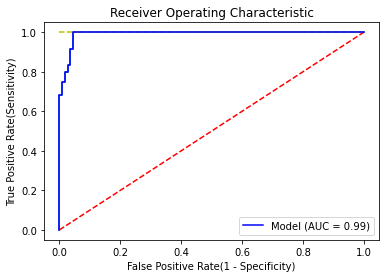

In [26]:
plt.plot( false_positive_rate,true_positive_rate)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.legend(loc='lower right')